# The Beatles

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import json
import random
import shlex

In [5]:
from fastai.text import *

In [6]:
from pathlib import PosixPath

In [32]:
bs=48

In [8]:
path = PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles')
path.ls()

[PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/random-train'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/valid-lyrics'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train-lyrics3'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train-lyrics2'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/export.pkl'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/data_lm_lyrics.pkl'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/data.pkl'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train-lyrics'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/models'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/lyrics.pkl'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/.ipynb_checkpoints'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/music.pkl'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/data_lm.pkl'),
 Po

In [45]:
data_lm_lyrics = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train-lyrics3']) 
           #We may have other temp folders that contain text files so we only keep what's in train
            .split_by_rand_pct(0.2)
#             .split_by_folder("train-lyrics", "valid-lyrics")
            #.split_none()
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm_lyrics.save('data_lm_lyrics.pkl')

In [46]:
data_lm_lyrics = load_data(path, 'data_lm_lyrics.pkl', bs=bs)

In [47]:
data_lm_lyrics.show_batch()

idx,text
0,do n't let me down xxmaj do n't let me down xxmaj do n't let me down i 'm in love for the first time xxmaj do n't you know it 's going to last xxmaj it 's a love that xxunk forever xxmaj it 's a love that has no past xxmaj do n't let me down xxmaj do n't let me down xxmaj do n't let me down
1,"xxunk died in the xxunk and was xxunk along with her name . xxmaj nobody came . xxmaj father xxunk , xxunk the dirt from his hands as he xxunk from the xxunk . xxmaj no - one was xxunk . xxmaj all the lonely people , where do they all come from ? xxmaj all the lonely people , where do they all belong ? xxmaj oh yeah alright"
2,"going down xxmaj and the eyes in his head see the world spinning round . xxmaj well on the way , head in a cloud , xxmaj the man of a thousand voices talking xxunk xxunk . xxmaj but nobody ever xxunk him xxmaj or the sound he xxunk to make xxmaj and he never seems to notice . xxmaj but the fool on the hill sees the sun going"
3,". xxmaj go home xxmaj get back , get back . xxmaj back to where you once belonged xxmaj get back , get back . xxmaj back to where you once belonged . xxmaj get back xxmaj xxunk . xxmaj sweet xxmaj loretta xxmaj xxunk thought she was a woman xxmaj but she was another man xxmaj all the girls around her say she 's got it coming xxmaj but"
4,"mind , xxmaj shine , the weather 's fine . i can show you that when it starts to rain , xxmaj everything 's the same , i can show you , i can show you . xxmaj rain , i do n't mind , xxmaj shine , the weather 's fine . xxmaj can you hear me that when it xxunk and shines , xxmaj it 's just a"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `~/.fastai/models/` (or elsewhere if you specified different paths in your config file).

In [57]:
learn_lyrics = language_model_learner(data_lm_lyrics, AWD_LSTM, drop_mult=0.3)

In [58]:
learn_lyrics.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


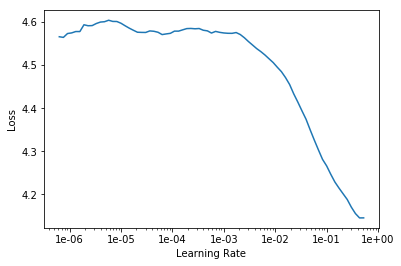

In [59]:
learn_lyrics.recorder.plot(skip_end=15)

In [60]:
learn_lyrics.fit_one_cycle(1, 1e-01, moms=(0.6,0.5))

epoch,train_loss,valid_loss,accuracy,time
0,3.928599,3.641764,0.263244,00:02


In [61]:
data_lm_lyrics.valid_ds.items

array([array([  2,   5,  34,  59, ..., 108,  57,  89,  11]), array([  2,  12,  95, 247, ...,  39,   9,  39,  11])],
      dtype=object)

In [62]:
learn_lyrics.save('fit_head_lyrics')

In [69]:
learn_lyrics.load('fit_head_lyrics');

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [70]:
learn_lyrics.unfreeze()

In [71]:
learn_lyrics.fit_one_cycle(6, 1e-2, moms=(0.8,0.7)) # moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.978756,3.615579,0.271577,00:03
1,2.750927,3.790543,0.262128,00:03
2,2.366141,3.809052,0.262351,00:03
3,1.943161,3.971256,0.266964,00:03
4,1.544134,4.060877,0.265551,00:03
5,1.219733,4.155464,0.263095,00:03


In [18]:
learn_lyrics.save('fine_tuned_lyrics')

How good is our model? Well let's try to see what it predicts after a few given words.

In [19]:
learn_lyrics.load('fine_tuned_lyrics');

In [20]:
TEXT = 'love'# '["I"'#'["I", 
N_WORDS = 100
N_SENTENCES = 1

In [21]:
bridge_words = ["Love", "Can\'t", "Day", "Eight", "ah", "When", "Help", "Nah", "I\'m", "That", "And", "She", "Because", "Yeah", "you\'re", "I", "Life"]
verse_words = ["There\'s", "Something", "Nothing", "Can\'t", "Ooh", "Saw", "Here", "He", "Got", "She", "Tried", "Love", "Eleanor", "Father", "Jo", "Sweet", "It\'s", "you", "you", "I", "When", "Now", "Hey", "baby\'s", "baby", "Oh", "Yeah", "Lady", "When", "And", "For", "I", "Love", "Dear", "It\'s", "If", "In", "On", "Behind", "You", "I", "She", "Try", "Think", "In", "And", "So", "yesterday", "As", "Suddenly", "yesterday"]
chorus_words = ["all", "We", "Why", "Penny", "We", "She", "I", "She\'s", "Don\'t", "We","Paperback", "She", "Let", "Someone", "Can\'t", "hold", "Come", "All", "She", "Get", "Oh", "When", "Hello", "You", "I", "Help", "And", "So", "I\'m", "She\'s", "I", "Tuesday", "See", "Friday"]
bridge_words = [x.lower() for x in bridge_words]       
verse_words = [x.lower() for x in verse_words]
chorus_words = [x.lower() for x in chorus_words]
import random

VERSE = random.choice(verse_words)
VERSE2 = random.choice(verse_words)
VERSE3 = random.choice(verse_words)
CHORUS = random.choice(chorus_words)
BRIDGE = random.choice(bridge_words)
V_WORDS = 50
C_WORDS = 50
B_WORDS = 50
N_SENTENCES = 1

In [22]:
#print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))
chorus = "\n".join(learn_lyrics.predict(CHORUS, C_WORDS, temperature=0.75) for _ in range(N_SENTENCES))
print("\n".join(learn_lyrics.predict(VERSE, V_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))
print(chorus)
print("\n".join(learn_lyrics.predict(VERSE2, V_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))
print(chorus)
print("\n".join(learn_lyrics.predict(BRIDGE, B_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))
print(chorus)
#print("\n".join(learn.predict(VERSE3, V_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))




dear The Way out ( the way that you shout ) But when i get home with you , i 'm thinking of it You know i 'm gon na be my baby Everybody 's got a baby , yeah , Well you know my
friday there is a thing to hide a fool and about the thrill of love . Each one shows you , one , Make you love me for loving me . You know you may be true , But you may be glad . All you
dear Though the sun was in the sky , the sky was blue , his sky was blue , City sky was blue , yellow , green , and blue , green , It 's a rich and beautiful thing . You know , here i 'm
friday there is a thing to hide a fool and about the thrill of love . Each one shows you , one , Make you love me for loving me . You know you may be true , But you may be glad . All you
because a car window shop made a thing to Buy , As they could It 's a feeling i said , i know you 're gon na have a real old boys , If you 're feeling sorry , i ca n't see you again .
friday there is a thing to hide a fool and about the thrill of love . Each one

We have to save not only the model, but also its encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [23]:
learn_lyrics.save_encoder('fine_tuned_enc_lyrics')

In [24]:
learn_lyrics.export()

## Language model

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [50]:
bs=48

In [51]:
path = PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles')
path.ls()

[PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/random-train'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/valid-lyrics'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train-lyrics2'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/export.pkl'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/data_lm_lyrics.pkl'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/data.pkl'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train-lyrics'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/models'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/lyrics.pkl'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/.ipynb_checkpoints'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/music.pkl'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/data_lm.pkl'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train-lyrics-one-fil

In [52]:
(path/'train').ls()

[PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/help.txt'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/eleanor-rigby.txt'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/something.txt'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/day-tripper.txt'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/ticket-to-ride.txt'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/hello-goodbye.txt'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/get-back.txt'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/she-loves-you.txt'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/lady-madonna.txt'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/yesterday.txt'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/eight-days-a-week.txt'),
 PosixPath('/home/ubuntu/course-v3/nbs/dl1/data/beatles/train/love-me-do.txt'),
 PosixPath('/home/ubuntu/co

In [53]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [54]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [55]:
data_lm.show_batch()

idx,text
0,", 0.5 ] , [ "" iimin "" , "" c "" , 7 , 0.5 ] , [ "" iimin / xxmaj imaj "" , "" c "" , 7 , 1 ] , [ "" iimin / xxmaj imaj "" , "" w "" , 5 , 1 ] , \n [ "" bviimaj "" , "" w "" , 10 , 2 ] , [ """
1,""" , 4 , 0.5 ] , [ "" bviimaj "" , "" c "" , 2 , 1.5 ] , \n [ "" bviimaj "" , "" c "" , 2 , 2 ] , [ "" bviimaj / vimin "" , "" c "" , 2 , 2 ] , \n [ "" xxmaj vmaj7 "" , "" w "" , 7 , 1 ] ,"
2,"[ "" bviimaj "" , "" c "" , 2 , 1 ] , [ "" bviimaj "" , "" w "" , 5 , 0.5 ] , \n [ "" bviimaj "" , "" c "" , 5 , 2 ] , [ "" bviimaj "" , "" c "" , 4 , 0.5 ] , [ "" bviimaj "" , "" c "" , 2 , 1.5"
3,""" , 7 , 0.5 ] , \n [ "" bviimaj "" , "" c "" , 7 , 1 ] , [ "" bviimaj "" , "" w "" , 5 , 1 ] , [ "" bviimaj "" , "" w "" , 4 , 0.5 ] , [ "" bviimaj "" , "" c "" , 2 , 1 ] , [ "" bviimaj "" ,"
4,"] , \n [ "" vimin6 "" , "" c "" , 0 , 0.5 ] , [ "" vimin6 "" , "" c "" , -3 , 1.5 ] , [ "" vimin6 "" , "" n "" , null , 1 ] , [ "" vimin6 "" , "" w "" , -3 , 0.5 ] , [ "" vimin6 "" , "" w "" , 9"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `~/.fastai/models/` (or elsewhere if you specified different paths in your config file).

In [80]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [81]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


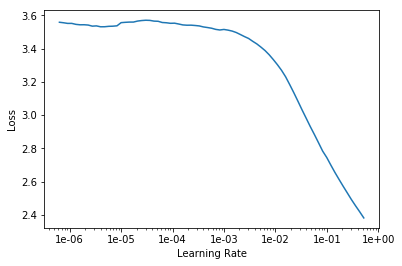

In [82]:
learn.recorder.plot(skip_end=15)

In [83]:
learn.fit_one_cycle(1, 1e-02, moms=(0.5,0.5)) # moms=(0.4,0.3))

epoch,train_loss,valid_loss,accuracy,time
0,1.925745,0.881683,0.794643,00:03


In [84]:
learn.save('fit_head')

In [112]:
learn.load('fit_head');

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [113]:
learn.unfreeze()

In [114]:
learn.fit_one_cycle(3, 1e-2, moms=(0.7,0.6)) # moms=(0.4,0.3))

epoch,train_loss,valid_loss,accuracy,time
0,0.865443,0.568694,0.838542,00:05
1,0.650101,0.504369,0.847173,00:04
2,0.562353,0.538914,0.841518,00:04


In [39]:
learn.save('fine_tuned')

How good is our model? Well let's try to see what it predicts after a few given words.

In [40]:
learn.load('fine_tuned');

In [41]:
learn.save_encoder('fine_tuned_enc_music')

In [42]:
learn.export()

In [43]:
N_SENTENCES = 1
V = 'xxverse'
C = 'xxchorus'
B = 'xxbridge'
chars_in_group = 10
V_WORDS = 32 * chars_in_group
C_WORDS = 23 * chars_in_group
B_WORDS = 15 * chars_in_group

In [44]:
bridge_words = ["Love", "Can\'t", "Day", "Eight", "ah", "When", "Help", "Nah", "I\'m", "That", "And", "She", "Because", "Yeah", "you\'re", "I", "Life"]
verse_words = ["There\'s", "Something", "Nothing", "Can\'t", "Ooh", "Saw", "Here", "He", "Got", "She", "Tried", "Love", "Eleanor", "Father", "Jo", "Sweet", "It\'s", "you", "you", "I", "When", "Now", "Hey", "baby\'s", "baby", "Oh", "Yeah", "Lady", "When", "And", "For", "I", "Love", "Dear", "It\'s", "If", "In", "On", "Behind", "You", "I", "She", "Try", "Think", "In", "And", "So", "yesterday", "As", "Suddenly", "yesterday"]
chorus_words = ["all", "We", "Why", "Penny", "We", "She", "I", "She\'s", "Don\'t", "We","Paperback", "She", "Let", "Someone", "Can\'t", "hold", "Come", "All", "She", "Get", "Oh", "When", "Hello", "You", "I", "Help", "And", "So", "I\'m", "She\'s", "I", "Tuesday", "See", "Friday"]
bridge_words = [x.lower() for x in bridge_words]       
verse_words = [x.lower() for x in verse_words]
chorus_words = [x.lower() for x in chorus_words]


VERSE_start = random.choice(verse_words)
VERSE2_start = random.choice(verse_words)
VERSE3_start = random.choice(verse_words)
CHORUS_start = random.choice(chorus_words)
BRIDGE_start = random.choice(bridge_words)

In [45]:
#print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))
chorus_lyrics = "".join(learn_lyrics.predict(CHORUS_start, C_WORDS, temperature=0.75))
verse_lyrics = "".join(learn_lyrics.predict(VERSE_start, V_WORDS, temperature=0.75))
verse2_lyrics = "".join(learn_lyrics.predict(VERSE2_start, V_WORDS, temperature=0.75))

bridge_lyrics = "".join(learn_lyrics.predict(BRIDGE_start, B_WORDS, temperature=0.75))





In [46]:
def remove_stray_quote_marks(string):
    new_string = string.replace("'", '')
    return new_string.replace('"', '')

In [47]:
cleaned_chorus_lyrics = remove_stray_quote_marks(chorus_lyrics)
cleaned_verse_lyrics = remove_stray_quote_marks(verse_lyrics)
cleaned_verse2_lyrics = remove_stray_quote_marks(verse2_lyrics)
cleaned_bridge_lyrics = remove_stray_quote_marks(bridge_lyrics)



In [48]:
chorus_lyrics_split = shlex.split(cleaned_chorus_lyrics)
cls = cleaned_chorus_lyrics.split()
verse_lyrics_split = shlex.split(cleaned_verse_lyrics)
verse2_lyrics_split = shlex.split(cleaned_verse2_lyrics)
bridge_lyrics_split = shlex.split(cleaned_bridge_lyrics)

In [49]:
print(chorus_lyrics_split)

['she', ',', 'The', 'key', 'for', 'a', 'woman', 'that', 'Come', 'on', 'is', 'shake', 'it', 'Come', 'on', 'and', 'come', 'on', ',', 'come', 'on', ',', 'come', 'on', 'Come', 'on', 'is', 'such', 'a', 'joy', 'Come', 'on', 'is', 'such', 'a', 'joy', 'Come', 'on', 'is', 'such', 'a', 'joy', 'Come', 'on', 'is', 'such', 'a', 'joy', 'Come', 'on', 'is', 'such', 'a', 'joy', 'Come', 'on', 'take', 'it', 'easy', 'Come', 'on', 'is', 'such', 'a', 'joy', 'Come', 'on', 'is', 'such', 'a', 'joy', 'Come', 'on', 'take', 'it', 'easy', ',', 'come', 'on', ',', 'come', 'on', ',', 'Come', 'on', 'is', 'such', 'a', 'joy', 'Come', 'on', 'take', 'it', 'easy', ',', 'it', 's', 'such', 'a', 'joy', 'Come', 'on', 'is', 'such', 'a', 'joy', 'Come', 'on', 'take', 'it', 'easy', 'Come', 'on', 'take', 'it', 'easy', '.', 'They', 'sit', 'at', 'you', 'and', 'fly', ',', 'Come', 'on', 'is', 'such', 'a', 'joy', 'Come', 'on', 'take', 'it', 'easy', ',', 'take', 'it', 'easy', 'Come', 'on', 'take', 'it', 'easy', 'Come', 'on', 'take', 'it'

In [50]:
print(verse_lyrics_split)
print(chorus_lyrics_split)
print(verse2_lyrics_split)
print(chorus_lyrics_split)
print(bridge_lyrics_split)


['you', 'think', 'in', 'of', 'his', 'life', 'Evrything', 'has', 'been', 'like', 'having', 'been', 'realised', ',', 'For', 'at', 'nine', 'o', 'and', 'i', 'my', 'mind', 'is', 'in', 'light', 'Evrything', 'has', 'been', 'set', 'upon', 'my', 'mind', '.', 'Evrything', 'has', 'got', 'to', 'bring', 'down', 'though', 'my', 'evrything', 'has', 'been', 'right', 'I', 'm', 'so', 'sorry', 'i', 'know', 'that', 'i', 'm', 'lying', 'there', ',', 'i', 'm', 'there', 'Tell', 'me', 'why', 'i', 'm', 'far', 'apart', 'from', 'me', '.', 'Do', 'nt', 'let', 'me', 'know', 'why', 'you', 'cried', ',', 'When', 'i', 'saw', 'you', 'standing', 'there', ',', 'i', 'm', 'gon', 'na', 'walk', 'right', 'into', 'my', 'head', '.', 'Crying', ',', 'crying', ',', 'waiting', ',', 'hoping', ',', 'hoping', ',', 'hoping', ',', 'you', 'll', 'understand', ',', 'Please', 'll', 'be', 'all', 'right', ',', 'crying', ',', 'crying', ',', 'waiting', ',', 'hoping', ',', 'hoping', ',', 'you', 'll', 'meet', ',', 'i', 've', 'been', 'here', ',', 'i

In [51]:
keys = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
key_weights = [4 / 22, 1 / 22, 3 / 22, 2 / 22, 1 / 22, 2 / 22, 9 / 22 ]
key = random.choices(
         population=keys,
         weights=key_weights,
         k=1)
key = key[0]

In [52]:
tempos = [138, 98, 120, 102, 125, 65, 72, 112, 150, 165, 108, 138, 70, 78, 94, 99, 123, 138, 138, 137, 171, 100]
tempo = random.choice(tempos)

In [53]:
def clean_line(line):
    start = line.find('[')
    clean_start = line[start:]
    clean_end = ']'.join(clean_start.split(']')[:-1]) + ']'
    return clean_end

In [54]:
response_obj = {
    'tempo': tempo,
    'key': key,
    'verse_one': [],
    'verse_two': [],
    'verse_three': [],
    'chorus': [],
    'bridge': []
}

In [55]:
def make_chords_readable(chord):
    lower_chord = chord.lower().strip()
    chord_list = {
        'isus': 'Isus',
        'i6': 'I6',
        'imaj': 'I',
        'imaj7': 'I7',
        'imaj / viidim': 'I/vii',
        'imin': 'i',
        'iimaj': 'II',
        'iimaj7': 'II7',
        'iimin': 'ii',
        'iimin7': 'ii7',
        'biiimaj': 'bIII',
        'iiimin': 'iii',
        'iiimin7': 'iii7',
        'iiimaj': 'III',
        'iiimaj7': 'III7',
        'ivmaj': 'IV',
        'ivmaj7': 'IV7',
        'ivmaj / vmaj': 'IV/V',
        'ivmin': 'iv',
        'vmaj': 'V',
        'vmaj7': 'V7',
        'bvimaj': 'bVI',
        'vimin': 'vi',
        'vimin7': 'vi7',
        'vimin / vmaj': 'vi/V',
        'bviimaj': 'VII',
        'xxbridge': 'I',
        'w': 'IV',
        'n': 'V',
        'c': 'iv'
    }
    return chord_list[lower_chord]

In [56]:
def simplify_chords(piece_str):
    piece_list = json.loads(piece_str)
    mod_piece_list = []
    for i, piece in enumerate(piece_list):
        chord = make_chords_readable(piece[0])
        new_piece = []
        new_piece.append(chord)
        new_piece.extend([piece[1], piece[2], piece[3]])
        mod_piece_list.append(new_piece)
    return mod_piece_list

In [59]:
# TODO: determine how many bars are in most choruses, verses etc 
# and then make sure the total length of all song parts is divisible by 4
#TODO: remove excess white space between everything
verse_str = clean_line("".join(learn.predict(V, V_WORDS, temperature=0.75)))
chorus_str = clean_line("".join(learn.predict(C, C_WORDS, temperature=0.75)))
bridge_str = clean_line("".join(learn.predict(B, B_WORDS, temperature=0.75)))
#print(verse)


In [60]:
verse = simplify_chords('['+ verse_str + ']')
chorus = simplify_chords('['+ chorus_str + ']')
bridge = simplify_chords('['+ bridge_str + ']')

In [ ]:
print(verse)
print(chorus)
print(bridge)

In [61]:
## THIS STEP IS WHERE I PUT LYRICS INTO
#print(verse)
# FIX changing original thing in place
def replace_w_with_word(part_of_song, part_of_song_lyrics):
    new_part_of_song = part_of_song
    new_part_of_song_lyrics = part_of_song_lyrics
    for i, grouping in enumerate(new_part_of_song):
        if grouping[1] == ' w ':
            grouping[1] = new_part_of_song_lyrics[i]
    print(new_part_of_song)
    return new_part_of_song

In [ ]:
print(chorus)

In [62]:
verse_1_complete = replace_w_with_word(verse, verse_lyrics_split)
verse_2_complete = replace_w_with_word(verse, verse2_lyrics_split)
chorus_complete = replace_w_with_word(chorus, chorus_lyrics_split)
bridge_complete = replace_w_with_word(bridge, bridge_lyrics_split)

[['I', ' n ', None, 2], ['I', 'think', -5, 0.5], ['I', 'in', 2, 1], ['I', 'of', 2, 0.5], ['I', 'his', 0, 0.5], ['I', 'life', -5, 0.33], ['I', 'Evrything', 0, 0.5], ['V', 'has', 0, 1.5], ['V', 'been', None, 2], ['V', 'like', 4, 0.5], ['V', 'having', 0, 1], ['V', 'been', 2, 0.5], ['V', 'realised', 2, 0.25], ['I', ' c ', 0, 0.5], ['I', 'For', 0, 1], ['I', 'at', 0, 0.5], ['IV', 'nine', 4, 0.25], ['IV', ' c ', 2, 0.5], ['IV', 'and', 2, 0.5], ['IV', 'i', 0, 0.5], ['IV', ' c ', 0, 0.5]]
[['I', ' n ', None, 2], ['I', 'think', -5, 0.5], ['I', 'in', 2, 1], ['I', 'of', 2, 0.5], ['I', 'his', 0, 0.5], ['I', 'life', -5, 0.33], ['I', 'Evrything', 0, 0.5], ['V', 'has', 0, 1.5], ['V', 'been', None, 2], ['V', 'like', 4, 0.5], ['V', 'having', 0, 1], ['V', 'been', 2, 0.5], ['V', 'realised', 2, 0.25], ['I', ' c ', 0, 0.5], ['I', 'For', 0, 1], ['I', 'at', 0, 0.5], ['IV', 'nine', 4, 0.25], ['IV', ' c ', 2, 0.5], ['IV', 'and', 2, 0.5], ['IV', 'i', 0, 0.5], ['IV', ' c ', 0, 0.5]]
[['I', 'she', 4, 0.5], ['I', '

In [ ]:
print(verse_1_complete)
print(verse_2_complete)
print(chorus_complete)
print(bridge_complete)

In [63]:
response_obj['verse_one'] = verse_1_complete
response_obj['verse_two'] = verse_2_complete
response_obj['chorus'] = chorus_complete
response_obj['bridge'] = bridge_complete



In [64]:
j= json.dumps(response_obj)
print(j)

{"tempo": 138, "key": "d", "verse_one": [["I", " n ", null, 2], ["I", "think", -5, 0.5], ["I", "in", 2, 1], ["I", "of", 2, 0.5], ["I", "his", 0, 0.5], ["I", "life", -5, 0.33], ["I", "Evrything", 0, 0.5], ["V", "has", 0, 1.5], ["V", "been", null, 2], ["V", "like", 4, 0.5], ["V", "having", 0, 1], ["V", "been", 2, 0.5], ["V", "realised", 2, 0.25], ["I", " c ", 0, 0.5], ["I", "For", 0, 1], ["I", "at", 0, 0.5], ["IV", "nine", 4, 0.25], ["IV", " c ", 2, 0.5], ["IV", "and", 2, 0.5], ["IV", "i", 0, 0.5], ["IV", " c ", 0, 0.5]], "verse_two": [["I", " n ", null, 2], ["I", "think", -5, 0.5], ["I", "in", 2, 1], ["I", "of", 2, 0.5], ["I", "his", 0, 0.5], ["I", "life", -5, 0.33], ["I", "Evrything", 0, 0.5], ["V", "has", 0, 1.5], ["V", "been", null, 2], ["V", "like", 4, 0.5], ["V", "having", 0, 1], ["V", "been", 2, 0.5], ["V", "realised", 2, 0.25], ["I", " c ", 0, 0.5], ["I", "For", 0, 1], ["I", "at", 0, 0.5], ["IV", "nine", 4, 0.25], ["IV", " c ", 2, 0.5], ["IV", "and", 2, 0.5], ["IV", "i", 0, 0.5],

In [ ]:
# TODO: add in lyrics
# TODO: create server, first in flask, then in fastapi?
# add functionality to change key, tempo, and save on front end
# create front end and make it able to play twice

We have to save not only the model, but also its encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.